**WEATHER FORCASTING PROJECT**

**Mounting Drive**

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing pandas and Loading the Dataset**

In [108]:
import pandas as pd
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Weather_data.csv', index_col = "DATE")
#displaying the first five enteries of the dataset
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT09,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1965-01-01,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",NaN,NaN,NaN,0.21,0.0,7.0,NaN,41.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1965-01-02,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",NaN,NaN,NaN,1.16,4.0,0.0,NaN,42.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1965-01-03,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",NaN,NaN,NaN,0.14,1.0,4.0,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1965-01-04,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",NaN,NaN,NaN,0.00,0.0,3.0,NaN,38.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1965-01-05,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",NaN,NaN,NaN,0.19,0.0,2.0,NaN,45.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


**Cleaning the Data**

Calculating the null percentage

In [109]:
#finding the number of null values in each column then dividing them by the total rows to get the percentage of null values in each column
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.559452
FMTM       0.870556
PGTM       0.747134
PRCP       0.001311
SNOW       0.312221
SNWD       0.310375
TAVG       0.878084
TMAX       0.000583
TMIN       0.000583
TSUN       0.942102
WDF2       0.559112
WDF5       0.559355
WSF2       0.559112
WSF5       0.559306
WT01       0.610550
WT02       0.926413
WT03       0.990528
WT04       0.997231
WT05       0.998397
WT06       0.995629
WT07       0.999951
WT08       0.953371
WT09       0.998397
WT13       0.978483
WT14       0.987420
WT15       0.999709
WT16       0.701622
WT17       0.999077
WT18       0.974208
WT19       0.999466
WT22       0.998543
WV03       0.999806
dtype: float64

cleaning the data

In [110]:
#finding the columns that only have less than five percent null values
valid_columns = weather.columns[null_pct < 0.5]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [111]:
#altering our original dataset to only contain the valid columns
#using .copy() to avoid future warnings
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()

Completing the Missing Data

In [112]:
#ffil searches for the last non-null value in that column and copies it
weather = weather.ffill()

In [113]:
#check if all the missing data has been replaced by non-null values
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [114]:
#checking for appropriate datatypes
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [115]:
weather.index

Index(['1965-01-01', '1965-01-02', '1965-01-03', '1965-01-04', '1965-01-05',
       '1965-01-06', '1965-01-07', '1965-01-08', '1965-01-09', '1965-01-10',
       ...
       '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23',
       '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28'],
      dtype='object', name='DATE', length=20588)

Converting the Index DATE from object type to datetime type to make processing feasible

In [116]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1965-01-01', '1965-01-02', '1965-01-03', '1965-01-04',
               '1965-01-05', '1965-01-06', '1965-01-07', '1965-01-08',
               '1965-01-09', '1965-01-10',
               ...
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22',
               '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', name='DATE', length=20588, freq=None)

Checking for Gaps

In [117]:
#The following line of code counts the entries for each year within the dataset and displays a sorted list
weather.index.year.value_counts().sort_index()

1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    182
1998    110
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    209
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

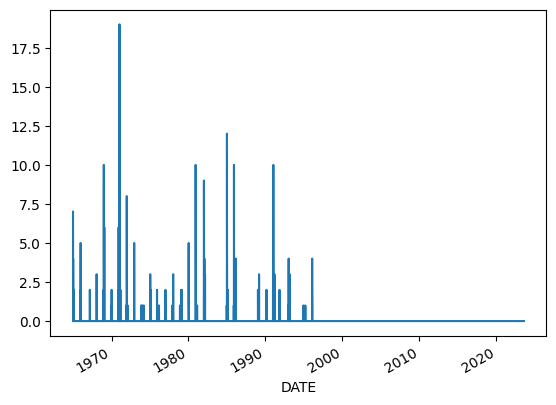

In [118]:
weather["snwd"].plot()

**Prepping the Data for Machine Learning**

In [119]:
#since we want to predict the max and min temperature, we append a new column called target that is populated using the next day tmax values
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1965-01-01,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.21,0.0,7.0,41.0,35.0,42.0
1965-01-02,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",1.16,4.0,0.0,42.0,32.0,36.0
1965-01-03,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.14,1.0,4.0,36.0,24.0,38.0
1965-01-04,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,3.0,38.0,24.0,45.0
1965-01-05,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.19,0.0,2.0,45.0,25.0,42.0
...,...,...,...,...,...,...,...,...
2023-07-24,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,71.0,58.0,66.0
2023-07-25,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,66.0,54.0,73.0
2023-07-26,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,73.0,51.0,76.0


In the above data the target column contains the tmax values for the next day, however, the last value of the target column is missing as we donot have the next day data i.e. we would be predicting data that we don't have.

In [120]:
#populating the missing values using the last non-null value
#this isn't the correct data, however, one missing/incorrect value doesn't greatly impact the model
weather = weather.ffill()

**Training the Machine Learning Model**

**Ridge Regression Model**

> Ridge Regression is a linear regression technique that is used to address the problem of multicollinearity (high correlation) among the predictor variables in a regression model. It is an extension of ordinary least squares (OLS) regression, where the goal is to minimize the sum of squared residuals between the actual and predicted values. Ridge Regression introduces a regularization term to the traditional OLS objective function, which helps in stabilizing the model and reducing the impact of multicollinearity.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [121]:
from sklearn.linear_model import Ridge

Finding Coorelations Between Different Columns

In [122]:
weather.corr()

<ipython-input-122-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.120745,0.033546,-0.172420,0.023622,-0.171971
snow,0.120745,1.000000,0.324119,-0.146310,-0.135166,-0.132712
snwd,0.033546,0.324119,1.000000,-0.170080,-0.174743,-0.152459
tmax,-0.172420,-0.146310,-0.170080,1.000000,0.795588,0.905214
tmin,0.023622,-0.135166,-0.174743,0.795588,1.000000,0.761798
target,-0.171971,-0.132712,-0.152459,0.905214,0.761798,1.000000


In the above data precipitation is slightly coorelated to snow however, it isn't much coorelated to the rest of the features. On the flip side, tmin and tmax are highly coorelated.

In [123]:
#initialising the Ridge Regression Model
rr = Ridge(alpha = .1)

Making a List of Predictors

In [124]:
#the following of code gives us a list of features other than target, name and station (as they are of no use when making predictions)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

**Error Estimation:**
Since this is a time series based data we cannot use future data to predict the past data so we use time series cross-validation/back testing.

In [125]:
import pandas as pd

def backtest(weather, model, predictors, start=3650, step=90):
    # Initialize an empty list to store predictions and performance metrics for each iteration
    all_predictions = []

    # Loop through the time series data with a step size of 'step'
    for i in range(start, weather.shape[0], step):
        # Split the data into the training and test sets
        train = weather.iloc[:i, :]   # Training set contains data from the beginning up to index 'i' (exclusive)
        test = weather.iloc[i:(i+step), :]  # Test set contains data from index 'i' up to 'i + step' (exclusive)

        # Fit the model using the training data
        model.fit(train[predictors], train["target"])

        # Make predictions on the test data using the trained model
        preds = model.predict(test[predictors])

        # Create a pandas Series with predictions and use test index as the index for alignment
        preds = pd.Series(preds, index=test.index)

        # Concatenate the actual target values and the predictions into a DataFrame
        combined = pd.concat([test["target"], preds], axis=1)

        # Rename the columns for clarity
        combined.columns = ["actual", "prediction"]

        # Calculate the absolute difference between the predicted and actual target values
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        # Append the combined DataFrame to the list of predictions for each iteration
        all_predictions.append(combined)

    # Concatenate all the predictions together and return the result
    return pd.concat(all_predictions)


**Making Predictions**

In [126]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1974-12-30,38.0,43.484237,5.484237
1974-12-31,45.0,39.946760,5.053240
1975-01-01,45.0,46.532249,1.532249
1975-01-02,44.0,46.706710,2.706710
1975-01-03,43.0,45.968345,2.968345
...,...,...,...
2023-07-24,66.0,69.355478,3.355478
2023-07-25,73.0,64.751954,8.248046
2023-07-26,76.0,69.853768,6.146232


Generating an Accuracy Metric (Mean Absolute Error)

>Finding the average of differences



In [127]:
#importing the accracy metric
from sklearn.metrics import mean_absolute_error
#passing the actual and estimated values as parameters
mean_absolute_error(predictions["actual"], predictions["prediction"])


3.8174150662547923

The above accuracy metric implies that half the time we were about 3.8 degrees above the actual value while the other half of the times we were below it.

**Improving the Accracy of the Model** (Adding More Predictors)

Calculating the Average Temperature and Precipitation in the past few days

In [128]:
#function to calculate the percentage difference between new and old values
def pct_diff(old, new):
  return (new-old) / old

#Creating a function to compute the rolling mean over a specfic number of days (horizon) before the current day for a particular column
#this gives us the maximum average value of the column over the horizon which is then appended as a new column
def compute_rolling(weather, horizon, col):

  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  #calculating the percentage difference between the rolling mean and actual value
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

In [129]:
#defining the number of days as 3 and 14 to calculate the rolling means
rolling_horizons = [3 ,14]
for horizon in rolling_horizons:
  for col in ["tmax", "tmin", "prcp"]:
    weather = compute_rolling(weather, horizon, col)

In [130]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1965-01-01,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.21,0.0,7.0,41.0,35.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-02,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",1.16,4.0,0.0,42.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-03,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.14,1.0,4.0,36.0,24.0,38.0,39.666667,-0.092437,30.333333,-0.208791,0.503333,-0.721854,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-04,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,3.0,38.0,24.0,45.0,38.666667,-0.017241,26.666667,-0.100000,0.433333,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-05,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.19,0.0,2.0,45.0,25.0,42.0,39.666667,0.134454,24.333333,0.027397,0.110000,0.727273,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,71.0,58.0,66.0,74.333333,-0.044843,58.000000,0.000000,0.243333,2.000000,75.357143,-0.057820,57.500000,0.008696,0.052143,13.000000
2023-07-25,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,66.0,54.0,73.0,71.333333,-0.074766,56.666667,-0.047059,0.486667,0.500000,74.928571,-0.119161,57.214286,-0.056180,0.104286,6.000000
2023-07-26,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,73.0,51.0,76.0,70.000000,0.042857,54.333333,-0.061350,0.730000,0.000000,75.214286,-0.029440,56.785714,-0.101887,0.156429,3.666667


Note: Some column values in the above dataframe are null because we don't have a data of 14 days prior to them.

In [131]:
#removing the first 14 rows to get rid of null columns values
#iloc indexes by number
weather = weather.iloc[14:, :]

In [132]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1965-01-15,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,38.0,30.0,40.0,39.666667,-0.042017,32.000000,-0.062500,0.146667,-1.0,39.714286,-0.043165,27.785714,0.079692,0.170000,-1.000000
1965-01-16,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,40.0,29.0,37.0,40.333333,-0.008264,30.666667,-0.054348,0.010000,-1.0,39.571429,0.010830,27.571429,0.051813,0.087143,-1.000000
1965-01-17,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.02,0.0,0.0,37.0,29.0,40.0,38.333333,-0.034783,29.333333,-0.011364,0.006667,2.0,39.642857,-0.066667,27.928571,0.038363,0.078571,-0.745455
1965-01-18,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,40.0,27.0,46.0,39.000000,0.025641,28.333333,-0.047059,0.006667,-1.0,39.785714,0.005386,28.142857,-0.040609,0.078571,-1.000000
1965-01-19,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,46.0,32.0,47.0,41.000000,0.121951,29.333333,0.090909,0.006667,-1.0,39.857143,0.154122,28.642857,0.117207,0.065000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,71.0,58.0,66.0,74.333333,-0.044843,58.000000,0.000000,0.243333,2.0,75.357143,-0.057820,57.500000,0.008696,0.052143,13.000000
2023-07-25,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,66.0,54.0,73.0,71.333333,-0.074766,56.666667,-0.047059,0.486667,0.5,74.928571,-0.119161,57.214286,-0.056180,0.104286,6.000000
2023-07-26,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,73.0,51.0,76.0,70.000000,0.042857,54.333333,-0.061350,0.730000,0.0,75.214286,-0.029440,56.785714,-0.101887,0.156429,3.666667


In [133]:
#some missing values may arise due to dividing by zero, thus replace then with zero
weather = weather.fillna(0)

Adding another feature that computes the average of all the rows for that particular column before and including the sepcified row.

In [134]:
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
  #this line of code groups values according to the month and computes average of current day and everyday of that particular month for
  #every year before and including the current year
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean)
  #this line of code groups values according to the day of the year and computes average of current day and that day of every year before and
  #including the current year
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys = False).apply(expand_mean)


In [135]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1965-01-15,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,38.0,30.0,40.0,39.666667,-0.042017,...,27.785714,0.079692,0.170000,-1.000000,38.000000,38.000000,30.000000,30.000000,0.000000,0.000000
1965-01-16,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,40.0,29.0,37.0,40.333333,-0.008264,...,27.571429,0.051813,0.087143,-1.000000,39.000000,40.000000,29.500000,29.000000,0.000000,0.000000
1965-01-17,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.02,0.0,0.0,37.0,29.0,40.0,38.333333,-0.034783,...,27.928571,0.038363,0.078571,-0.745455,38.333333,37.000000,29.333333,29.000000,0.006667,0.020000
1965-01-18,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,40.0,27.0,46.0,39.000000,0.025641,...,28.142857,-0.040609,0.078571,-1.000000,38.750000,40.000000,28.750000,27.000000,0.005000,0.000000
1965-01-19,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.00,0.0,0.0,46.0,32.0,47.0,41.000000,0.121951,...,28.642857,0.117207,0.065000,-1.000000,40.200000,46.000000,29.400000,32.000000,0.004000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,71.0,58.0,66.0,74.333333,-0.044843,...,57.500000,0.008696,0.052143,13.000000,71.686524,72.446429,54.143436,54.732143,0.033013,0.029643
2023-07-25,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,66.0,54.0,73.0,71.333333,-0.074766,...,57.214286,-0.056180,0.104286,6.000000,71.683237,73.071429,54.143353,54.500000,0.033416,0.043929
2023-07-26,USW00024217,"BELLINGHAM INTERNATIONAL AIRPORT, WA US",0.73,0.0,0.0,73.0,51.0,76.0,70.000000,0.042857,...,56.785714,-0.101887,0.156429,3.666667,71.683998,73.642857,54.141537,55.035714,0.033819,0.046429


**Repredicting Using the Updated Dataframe**

In [136]:
#the following of code gives us a list of features other than target, name and station (as they are of no use when making predictions)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [137]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1975-01-13,42.0,44.793575,2.793575
1975-01-14,39.0,41.594006,2.594006
1975-01-15,45.0,40.211060,4.788940
1975-01-16,51.0,44.176952,6.823048
1975-01-17,49.0,47.880916,1.119084
...,...,...,...
2023-07-24,66.0,71.559090,5.559090
2023-07-25,73.0,68.828277,4.171723
2023-07-26,76.0,73.195254,2.804746


In [138]:
#passing the actual and estimated values as parameters
mean_absolute_error(predictions["actual"], predictions["prediction"])


3.6041211233099184

The overall accuracy of the Model has improved from 3.87 to 3.60.

In [139]:
#sorting the data on the basis of differences in actual and estimated values in descending order
predictions.sort_values("diff", ascending = False)


,actual,prediction,diff
DATE,,,
2001-11-06,79.0,48.612414,30.387586
1989-02-01,12.0,38.347063,26.347063
1990-12-18,16.0,40.578001,24.578001
1995-12-09,60.0,36.644205,23.355795
2022-12-18,17.0,39.337735,22.337735
...,...,...,...
1978-12-22,47.0,46.998591,0.001409
2001-08-04,68.0,67.998738,0.001262
2005-07-21,75.0,75.000776,0.000776


These anomalies arise due to the drastic differences in temperature which require more specific atmospheric details to predict correctly.

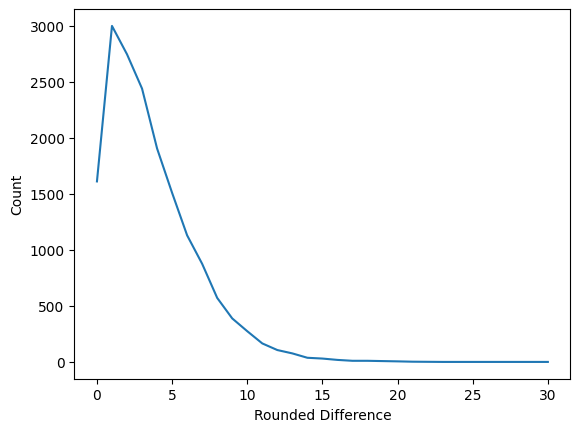

In [140]:
#plotting the errors
import matplotlib.pyplot as plt

# Assuming predictions is the DataFrame containing the "diff" column

# Calculate the value counts for each rounded difference
value_counts = predictions["diff"].round().value_counts().sort_index()

# Plot the value counts
value_counts.plot()

# Add labels to the X and Y axes
plt.xlabel("Rounded Difference")
plt.ylabel("Count")

# Display the plot
plt.show()